# Task :
#### 1. Data Cleaning and Exploratory Data Analysis (EDA)
#### 2. Customer Segmentation using RFM analysis

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('E-com_Data.csv')
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


# Part 1 : Data Cleaning and EDA

#### a) Identifying missing values and noise in the dataset
#### b) Cleaning and visualizing the data
#### b) Conducting analyses by invoice, product, other variable

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [ ]:
# CustomerID  - Mandatory
# InvoieNo - Frequency
# Date of purchase - Recency
# Price - Monetory

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,404189.0,2181.909035,1252.681881,2.0,1207.0,2078.0,3291.0,4372.0
InvoieNo,537979.0,385017.572063,13426.052649,361429.0,372961.0,385706.0,396873.0,406651.0
Quantity,537979.0,9.343339,27.623322,-2003.0,1.0,3.0,10.0,3186.0
price per Unit,537979.0,378.339062,440.048823,1.0,169.0,261.0,456.0,64973.0
Price,537979.0,2161.414593,4538.487177,-10152.0,451.0,1194.0,2232.0,90400.0
Sold as set,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [ ]:
drop_columns = ['Item Code','Quantity','Time', 'price per Unit','Shipping Location','Cancelled_status', 'Reason of return', 'Sold as set']
df.drop(drop_columns, axis=1, inplace=True)

In [ ]:
df.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [ ]:
df.duplicated().sum()

6008

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.Price.min()

-10152.0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,402859.0,2182.187224,1252.636483,2.0,1207.0,2078.0,3291.0,4372.0
InvoieNo,535107.0,385009.702116,13418.210488,361429.0,372964.0,385665.0,396811.0,406651.0
Price,535107.0,2167.848915,4547.338495,-10152.0,453.0,1200.0,2236.0,90400.0


In [ ]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/ df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=["missing_number","missing_percent"])
    return missing_values[missing_values["missing_number"]>0]
missing_values(df)

,missing_number,missing_percent
CustomerID,132249,0.247145
InvoieNo,1,0.000002
Date of purchase,1,0.000002
Price,1,0.000002


In [ ]:
df.isnull().sum().sort_values(ascending=False)

CustomerID          132249
InvoieNo                 1
Date of purchase         1
Price                    1
dtype: int64

In [ ]:
(df.isnull().sum()/ df.isnull().count()).sort_values(ascending=False)

CustomerID          0.247145
InvoieNo            0.000002
Date of purchase    0.000002
Price               0.000002
dtype: float64

In [ ]:
df = df.dropna(subset=['CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402859 entries, 0 to 537949
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        402859 non-null  float64
 1   InvoieNo          402859 non-null  float64
 2   Date of purchase  402859 non-null  object 
 3   Price             402859 non-null  float64
dtypes: float64(3), object(1)
memory usage: 15.4+ MB


In [ ]:
(df.isnull().sum()/ df.isnull().count()).sort_values(ascending=False)

CustomerID          0.0
InvoieNo            0.0
Date of purchase    0.0
Price               0.0
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402859 entries, 0 to 537949
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        402859 non-null  float64
 1   InvoieNo          402859 non-null  float64
 2   Date of purchase  402859 non-null  object 
 3   Price             402859 non-null  float64
dtypes: float64(3), object(1)
memory usage: 15.4+ MB


In [ ]:
import datetime
df['Date of purchase'] = pd.to_datetime(df['Date of purchase'])

In [ ]:
df = df.rename( columns = {'InvoieNo': "InvoiceNo", "Date of purchase":"Date"})

In [ ]:
df.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-10-05,1740.0
2,4352.0,394422.0,2017-10-12,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0


In [ ]:
df['Date'].describe().T

count                           402859
mean     2017-07-15 14:25:02.538605056
min                2016-12-02 00:00:00
25%                2017-04-12 00:00:00
50%                2017-08-05 00:00:00
75%                2017-10-26 00:00:00
max                2017-12-19 00:00:00
Name: Date, dtype: object

In [ ]:
df['CustomerID'].nunique()

4349

In [ ]:
new_date = datetime.datetime(2017,12,20)
new_date

datetime.datetime(2017, 12, 20, 0, 0)

In [ ]:
df['CustomerID']==4352.0

0         False
1          True
2          True
3          True
4          True
          ...  
537945    False
537946    False
537947    False
537948    False
537949    False
Name: CustomerID, Length: 402859, dtype: bool

# Part 2:  Customer Segmentation using RFM analysis

##### **RFM Analysis** : is a marketing techniques and method used to evaluate customer behavior
###### RFM stands for **Recency**, **Frequency**, and **Monetary**

- **Recency:** Indicates how recently a customer has made a purchase. Customer who have purchased more recently have a higher recency score.
- **Frequency:** Represents how many times a customer has made a purchase within a specific time period(typically within a year). Customer who
purchase more frequently have a higher frequency score

- **Monetary:** Refers to the total amount a customer has spent within a specific time period. Customer who spend more have a higher monetary score.

- A Score of **5** represent the best customers (most recent, most frequent, and highest spending)
- A score of **1** represent the lease engaged customers.

- **Prime (vip) Customers**
- **Loyal customers**
- **Potential customer**

In [ ]:
RFMApproach = df.groupby('CustomerID').agg({'Date': lambda x: (new_date - x.max()).days,
                                            'InvoiceNo': lambda x: x.count(),
                                            'Price': lambda x: x.sum()})
RFMApproach.rename(columns = {'Date':'Recency', 'InvoiceNo':'Frequency','Price':'Monetary'}, inplace=True)
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,181,550416.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0
...,...,...,...,...
4344,4368.0,278,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,9,13,24962.0
4347,4371.0,4,751,279720.0


In [ ]:
RFMApproach.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4349.0,93.299379,100.701315,1.0,18.0,51.0,144.0,381.0
Frequency,4349.0,92.632559,230.742279,1.0,17.0,42.0,101.0,7919.0
Monetary,4349.0,229493.932881,855668.518674,-50372.0,38140.0,83635.0,205444.0,35472089.0


In [ ]:
# Split the data into 4 segment basis quantile method

quantiles = RFMApproach.quantile(q=[0.25, 0.50, 0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

In [ ]:
def Recency_value(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [ ]:
def Freq_Mont_value(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [ ]:
RFMApproach['R'] = RFMApproach['Recency'].apply(Recency_value, args=('Recency', quantiles))
RFMApproach['F'] = RFMApproach['Frequency'].apply(Freq_Mont_value, args=('Frequency', quantiles))
RFMApproach['M'] = RFMApproach['Monetary'].apply(Freq_Mont_value, args=('Monetary', quantiles))

In [ ]:
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,2.0,4,181,550416.0,1,1,1
1,3.0,77,27,257404.0,3,3,1
2,4.0,19,72,176613.0,2,2,2
3,5.0,311,16,41976.0,4,4,3
4,6.0,37,84,151822.0,2,2,2
...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4
4345,4369.0,181,7,10774.0,4,4,4
4346,4370.0,9,13,24962.0,1,4,4
4347,4371.0,4,751,279720.0,1,1,1


In [ ]:
RFMApproach['RFM'] = RFMApproach[['R','F','M']].sum(axis=1)
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM
0,2.0,4,181,550416.0,1,1,1,3
1,3.0,77,27,257404.0,3,3,1,7
2,4.0,19,72,176613.0,2,2,2,6
3,5.0,311,16,41976.0,4,4,3,11
4,6.0,37,84,151822.0,2,2,2,6
...,...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4,12
4345,4369.0,181,7,10774.0,4,4,4,12
4346,4370.0,9,13,24962.0,1,4,4,9
4347,4371.0,4,751,279720.0,1,1,1,3


In [ ]:
RFMApproach.to_csv('RFMApproach.csv')

In [ ]:
RFMApproach['RFM'].value_counts()

RFM
10    508
3     471
7     461
9     458
8     447
5     439
12    410
6     405
11    380
4     370
Name: count, dtype: int64

In [ ]:
Loyality_Level = ['platinum','gold','silver','bronze']
score_cuts = pd.qcut(RFMApproach.RFM, q=4, labels=Loyality_Level)
RFMApproach['Loyality_Level'] = score_cuts.values
RFMApproach


,Recency,Frequency,Monetary,R,F,M,RFM,Loyality_Level
CustomerID,,,,,,,,
2.0,4,181,550416.0,1,1,1,3,platinum
3.0,77,27,257404.0,3,3,1,7,gold
4.0,19,72,176613.0,2,2,2,6,gold
5.0,311,16,41976.0,4,4,3,11,bronze
6.0,37,84,151822.0,2,2,2,6,gold
...,...,...,...,...,...,...,...,...
4368.0,278,10,20480.0,4,4,4,12,bronze
4369.0,181,7,10774.0,4,4,4,12,bronze
4370.0,9,13,24962.0,1,4,4,9,silver


In [ ]:
RFMApproach=RFMApproach.reset_index()
RFMApproach

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,Loyality_Level
0,2.0,4,181,550416.0,1,1,1,3,platinum
1,3.0,77,27,257404.0,3,3,1,7,gold
2,4.0,19,72,176613.0,2,2,2,6,gold
3,5.0,311,16,41976.0,4,4,3,11,bronze
4,6.0,37,84,151822.0,2,2,2,6,gold
...,...,...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4,12,bronze
4345,4369.0,181,7,10774.0,4,4,4,12,bronze
4346,4370.0,9,13,24962.0,1,4,4,9,silver
4347,4371.0,4,751,279720.0,1,1,1,3,platinum


In [ ]:
RFMApproach['Loyality_Level'].value_counts()

Loyality_Level
gold        1313
platinum    1280
silver       966
bronze       790
Name: count, dtype: int64

In [ ]:
RFMApproach.to_csv('Loyality_Level.csv')

In [ ]:
RFMApproach.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM',
       'Loyality_Level'],
      dtype='object')

In [ ]:
final_report = RFMApproach.groupby('Loyality_Level')[['Recency', 'Frequency', 'Monetary','CustomerID']].agg({'Recency': 'sum',
                                                                                                             'Frequency': 'sum',
                                                                                                             'Monetary':'sum',
                                                                                                             'CustomerID':'nunique'}).reset_index()

In [ ]:
final_report

,Loyality_Level,Recency,Frequency,Monetary,CustomerID
0,platinum,25971,294629,763311232.0,1280
1,gold,84142,75914,165998506.0,1313
2,silver,121714,23728,50215730.1,966
3,bronze,173932,8588,18543646.0,790


In [ ]:
final_report = final_report.rename(columns = {'CustomerID':'NumBuyers'})
final_report

,Loyality_Level,Recency,Frequency,Monetary,NumBuyers
0,platinum,25971,294629,763311232.0,1280
1,gold,84142,75914,165998506.0,1313
2,silver,121714,23728,50215730.1,966
3,bronze,173932,8588,18543646.0,790


In [ ]:
final_report['Percent'] = round(final_report['NumBuyers'] / final_report.NumBuyers.sum()*100,2)

In [ ]:
final_report

,Loyality_Level,Recency,Frequency,Monetary,NumBuyers,Percent
0,platinum,25971,294629,763311232.0,1280,29.43
1,gold,84142,75914,165998506.0,1313,30.19
2,silver,121714,23728,50215730.1,966,22.21
3,bronze,173932,8588,18543646.0,790,18.17


In [ ]:
final_report_1 = final_report[['Loyality_Level','NumBuyers','Percent']]
final_report_1

,Loyality_Level,NumBuyers,Percent
0,platinum,1280,29.43
1,gold,1313,30.19
2,silver,966,22.21
3,bronze,790,18.17


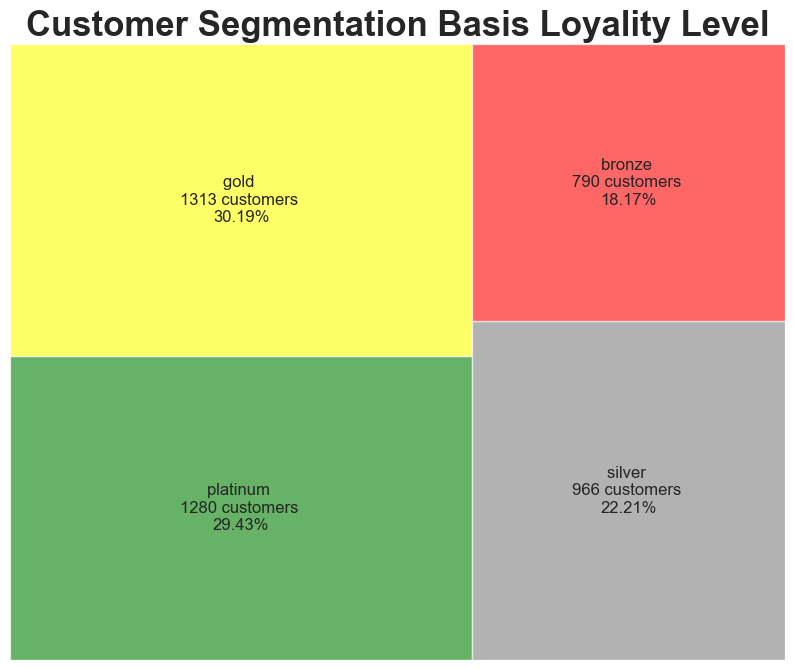

In [ ]:
import squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(10,8)
colors_dics = {'platinum':'green', 'gold':'yellow', 'silver':'gray', 'bronze':'red'}

squarify.plot(sizes=final_report_1['NumBuyers'], color = colors_dics.values(),
              label = ['{} \n{:0.0f} customers \n{}%'.format(*final_report_1.iloc[i]) for i in range(0, len(final_report_1))], alpha=0.6)
plt.title("Customer Segmentation Basis Loyality Level", fontsize=25, fontweight="bold")
plt.axis('off')
plt.show()